# Final Project (MP1–MP5)
## Araştırma Yöntem ve Teknikleri
**Nezaket Demirci**

**Araştırma Konusu:** Müzikte cinsiyetçi söylemler (mizojini, nesneleştirme, şiddet/taciz normalleşmesi) ve genç bireylerin algıları


In [1]:
import os
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

os.makedirs("Grafikler", exist_ok=True)


## MP1 – Problem ve Hipotez
**Problem Tanımı:** Popüler müzikte kadınlara yönelik aşağılayıcı, cinselleştirici, nesneleştirici ve şiddeti/tacizi normalleştiren ifadeler sıkça görülebilmektedir. Bu söylemlerin genç bireyler üzerindeki algısal etkileri toplumsal cinsiyet tutumlarını etkileyebilir.

**Araştırma Sorusu:** Genç bireyler müzikteki cinsiyetçi söylemleri nasıl algılar ve bu söylemlerin toplum üzerindeki etkisine dair tutumları nasıldır?

**Hipotez:** Katılımcıların büyük çoğunluğu cinsiyetçi söylemlerin toplum üzerinde olumsuz etkisi olduğunu düşünmekte ve bu ifadeleri rahatsız edici bulmaktadır.


## MP2 – Literatür Taraması (Kısa Özet)
Literatürde popüler kültürdeki cinsiyetçi söylemlerin gençlerin toplumsal cinsiyet algılarını ve davranış normlarını etkileyebileceği vurgulanmaktadır. Özellikle kadınların nesneleştirilmesi, hakaret/beddua söylemleri ve şiddetin/tacizin normalleşmesi gibi temalar rap/trap başta olmak üzere çeşitli türlerde incelenmiştir. Çalışmaların bir kısmı nitel yöntemlerle sınırlı kalırken, geniş katılımlı nicel tutum ölçümleri daha sınırlıdır. Bu proje, anket verisiyle nicel analiz yaparak bu boşluğa veri temelli katkı sunmayı hedefler.


## MP3 – Veri Toplama
**Yöntem:** Google Forms anketi  
**Katılımcı:** 253 kişi  
**Soru türleri:** Demografik sorular + Likert (5’li) tutum soruları + Evet/Hayır/Bazen gibi kategorik sorular


In [2]:
# === 1) Veriyi Yükle ===
df = pd.read_csv("data_mp3.csv")

# Sütun adlarını temizle (baş/son boşluklar)
df.columns = df.columns.str.strip()

print("Veri şekli (satır, sütun):", df.shape)
df.head(3)


Veri şekli (satır, sütun): (253, 27)


,Zaman damgası,Yaşınız,Cinsiyetiniz,En çok dinlediğiniz müzik türü,Müzikte cinsiyetçi söylemlerin toplum üzerinde etkili olduğunu düşünüyorum.,Şarkılarda kadınların aşağılanmasını rahatsız edici buluyorum.,Şarkı sözleri insanların kadınlara bakışını etkileyebilir.,Ünlülerin söylemleri/davranışları hayranları etkileyebilir.,Müziğin kadın düşmanlığını normalleştirdiğini düşünüyorum.,"Söz 1: ""Manita baya kasvetli\r\nO vücuduyla beni hapsetti\r\n""Tek gecelik, bi' daha olmaz"" diyince\r\nBen de dayanamadım, gasp ettim"" - B4TU INC\r\nSizce bu ifade tacizi normalleştiriyor mu?",...,"Söz 9: ""Görüyorsun yanımda motor gibi manitayı (manitayı)"" -Keişan & Anıl Piyancı\r\nSizce bu ifade kadını nesneleştiriyor mu?","Söz 10: ""Adı Katarina, verdim tam arasına\r\nDedi, ""Lütfen tekrar gel ara sıra""\r\n""Tanıştım Bebek'te, adı Natasha\r\nDedim, ""Uzatma bebek, yat aşa'"" -Era7capone & Batuflex & Narco\r\nSizce bu ifade kadını nesneleştiriyor mu?",Günlük hayatta kadın düşmanlığına sık rastladığımı düşünüyorum.,Cinsiyetçi müzik dinleyen kişilerin bu söylemleri ilişkilerine yansıttığını gözlemledim.,"Sizce müzik platformları (Spotify, YouTube vb.) bu tarz içerikleri filtrelemeli midir?",Bugüne kadar dinlediğiniz şarkılarda kadın düşmanlığı fark ettiniz mi?,Şarkılardaki cinsiyetçi söylemlere karşı daha fazla farkındalık oluşturulması gerektiğini düşünüyorum.,Bu konuda bir proje/çalışma yapılmasının önemli olduğunu düşünüyorum.,Cinsiyetçi sözler içeren şarkıları dinlemeyi bırakırım.,Şiddet içerikli sözler normalleştirici etki yaratıyor.
0,30.11.2025 17:01:03,15-18,Erkek,Rock/Metal,Katılıyorum.,Kesinlikle katılıyorum.,Katılıyorum.,Katılıyorum.,Katılıyorum.,Katılıyorum.,...,Katılıyorum.,Katılıyorum.,Evet.,Evet.,Evet.,Evet.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Katılıyorum.,Katılıyorum.
1,30.11.2025 17:01:27,19-24,Kadın,Çoğu türü dinliyorum.,Katılıyorum.,Kesinlikle katılıyorum.,Katılıyorum.,Katılıyorum.,Katılıyorum.,Kesinlikle katılıyorum.,...,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Hayır.,Emin değilim.,Evet.,Hayır.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Katılıyorum.
2,30.11.2025 17:02:02,15-18,Kadın,Çoğu türü dinliyorum.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Katılıyorum.,Kesinlikle katılıyorum.,...,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Evet.,Evet.,Evet.,Evet.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.,Kesinlikle katılıyorum.


In [3]:
# === 2) Hızlı Kontrol ===
display(df.info())
display(df.describe(include="all").T.head(12))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 27 columns):
 #   Column                                                                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                     --------------  ----- 
 0   Zaman damgası                                                                                                                                                                                                              253 non-null    object
 1   Yaşınız                                                                                                                                              

None

,count,unique,top,freq
Zaman damgası,253,251,30.11.2025 17:27:53,2
Yaşınız,253,4,19-24,157
Cinsiyetiniz,253,3,Kadın,151
En çok dinlediğiniz müzik türü,253,9,Çoğu türü dinliyorum.,101
Müzikte cinsiyetçi söylemlerin toplum üzerinde etkili olduğunu düşünüyorum.,253,5,Kesinlikle katılıyorum.,117
Şarkılarda kadınların aşağılanmasını rahatsız edici buluyorum.,253,5,Kesinlikle katılıyorum.,183
Şarkı sözleri insanların kadınlara bakışını etkileyebilir.,253,5,Kesinlikle katılıyorum.,106
Ünlülerin söylemleri/davranışları hayranları etkileyebilir.,253,5,Kesinlikle katılıyorum.,150
Müziğin kadın düşmanlığını normalleştirdiğini düşünüyorum.,253,5,Kesinlikle katılıyorum.,98
"Söz 1: ""Manita baya kasvetli\r\nO vücuduyla beni hapsetti\r\n""Tek gecelik, bi' daha olmaz"" diyince\r\nBen de dayanamadım, gasp ettim"" - B4TU INC\r\nSizce bu ifade tacizi normalleştiriyor mu?",253,5,Kesinlikle katılıyorum.,165


In [4]:
# === 3) Eksik Veri Kontrolü ===
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0] if (missing > 0).any() else "Eksik veri yok ✅"


'Eksik veri yok ✅'

## MP4 – Analiz ve Görselleştirme
Bu bölümde:
- Kategorik veriler sayısallaştırılır (Likert dönüşümü)
- Temel istatistikler çıkarılır
- Korelasyon matrisi oluşturulur
- Histogram / Scatter / Boxplot / Heatmap görselleştirmeleri yapılır


In [5]:
# === 4) Likert ve Kategorik Yanıtları Sayısallaştırma ===

likert_map = {
    "Kesinlikle katılmıyorum.": 1,
    "Katılmıyorum.": 2,
    "Kararsızım.": 3,
    "Katılıyorum.": 4,
    "Kesinlikle katılıyorum.": 5,
}

yn_map = {
    "Hayır.": 0,
    "Bazen.": 0.5,
    "Evet.": 1,
}

# Hangi sütunlar Likert? (içeriğinde bu seçeneklerden geçenleri bulalım)
sample_cols = []
for col in df.columns:
    vals = df[col].dropna().astype(str).unique()
    if any(v in likert_map for v in vals):
        sample_cols.append(col)

print("Likert tespit edilen sütun sayısı:", len(sample_cols))
sample_cols[:8]


Likert tespit edilen sütun sayısı: 19


['Müzikte cinsiyetçi söylemlerin toplum üzerinde etkili olduğunu düşünüyorum.',
 'Şarkılarda kadınların aşağılanmasını rahatsız edici buluyorum.',
 'Şarkı sözleri insanların kadınlara bakışını etkileyebilir.',
 'Ünlülerin söylemleri/davranışları hayranları etkileyebilir.',
 'Müziğin kadın düşmanlığını normalleştirdiğini düşünüyorum.',
 'Söz 1:  "Manita baya kasvetli\r\nO vücuduyla beni hapsetti\r\n"Tek gecelik, bi\' daha olmaz" diyince\r\nBen de dayanamadım, gasp ettim" - B4TU INC\r\nSizce bu ifade tacizi normalleştiriyor mu?',
 'Söz 2: "Taktım beşe, çıktım E5\'e (E5)\r\nE5\'te bi\' bayan dedi "Bana dayan" (Oo)\r\nDayandım, dayandım, davada uyandım\r\nHâkim dedi "Ne iş?", ben dedim "S*k*ş" -Ravend\r\nSizce bu ifade tacizi normalleştiriyor mu?',
 'Söz 3: "Elon Musk değilim ama \r\nk*ltağı sürüyo\'m sanki bi\' Tesla"\r\n"Sanırım bastım karına\r\nPasladım onu agalarıma" -DEHA INC\r\nSizce bu ifade kadını nesneleştiriyor mu?']

In [6]:
# Likert sütunlarını sayısala çevir
df_num = df.copy()

for col in sample_cols:
    df_num[col] = df_num[col].map(likert_map)

# Evet/Hayır/Bazen tarzı sütunları da dönüştürelim (varsa)
for col in df_num.columns:
    vals = set(df_num[col].dropna().astype(str).unique())
    if vals.issubset(set(yn_map.keys())):
        df_num[col] = df_num[col].map(yn_map)

df_num.head(3)


,Zaman damgası,Yaşınız,Cinsiyetiniz,En çok dinlediğiniz müzik türü,Müzikte cinsiyetçi söylemlerin toplum üzerinde etkili olduğunu düşünüyorum.,Şarkılarda kadınların aşağılanmasını rahatsız edici buluyorum.,Şarkı sözleri insanların kadınlara bakışını etkileyebilir.,Ünlülerin söylemleri/davranışları hayranları etkileyebilir.,Müziğin kadın düşmanlığını normalleştirdiğini düşünüyorum.,"Söz 1: ""Manita baya kasvetli\r\nO vücuduyla beni hapsetti\r\n""Tek gecelik, bi' daha olmaz"" diyince\r\nBen de dayanamadım, gasp ettim"" - B4TU INC\r\nSizce bu ifade tacizi normalleştiriyor mu?",...,"Söz 9: ""Görüyorsun yanımda motor gibi manitayı (manitayı)"" -Keişan & Anıl Piyancı\r\nSizce bu ifade kadını nesneleştiriyor mu?","Söz 10: ""Adı Katarina, verdim tam arasına\r\nDedi, ""Lütfen tekrar gel ara sıra""\r\n""Tanıştım Bebek'te, adı Natasha\r\nDedim, ""Uzatma bebek, yat aşa'"" -Era7capone & Batuflex & Narco\r\nSizce bu ifade kadını nesneleştiriyor mu?",Günlük hayatta kadın düşmanlığına sık rastladığımı düşünüyorum.,Cinsiyetçi müzik dinleyen kişilerin bu söylemleri ilişkilerine yansıttığını gözlemledim.,"Sizce müzik platformları (Spotify, YouTube vb.) bu tarz içerikleri filtrelemeli midir?",Bugüne kadar dinlediğiniz şarkılarda kadın düşmanlığı fark ettiniz mi?,Şarkılardaki cinsiyetçi söylemlere karşı daha fazla farkındalık oluşturulması gerektiğini düşünüyorum.,Bu konuda bir proje/çalışma yapılmasının önemli olduğunu düşünüyorum.,Cinsiyetçi sözler içeren şarkıları dinlemeyi bırakırım.,Şiddet içerikli sözler normalleştirici etki yaratıyor.
0,30.11.2025 17:01:03,15-18,Erkek,Rock/Metal,4,5,4,4,4,4,...,4,4,Evet.,Evet.,Evet.,Evet.,5,5,4,4
1,30.11.2025 17:01:27,19-24,Kadın,Çoğu türü dinliyorum.,4,5,4,4,4,5,...,5,5,Hayır.,Emin değilim.,Evet.,Hayır.,5,5,5,4
2,30.11.2025 17:02:02,15-18,Kadın,Çoğu türü dinliyorum.,5,5,5,5,4,5,...,5,5,Evet.,Evet.,Evet.,Evet.,5,5,5,5


In [7]:
# === 5) Temel İstatistikler (sayısallaştırılan kolonlar) ===
numeric_cols = df_num.select_dtypes(include=["number"]).columns.tolist()
print("Sayısal kolon sayısı:", len(numeric_cols))

basic_stats = pd.DataFrame({
    "mean": df_num[numeric_cols].mean(),
    "median": df_num[numeric_cols].median(),
    "std": df_num[numeric_cols].std(),
}).sort_values("mean", ascending=False)

basic_stats.head(10)


Sayısal kolon sayısı: 19


,mean,median,std
"Söz 7: "" Rüyalarımdasın sen yatağında uyurken (Slatt)\r\nS*ktim seni, attım otoban kenarına\r\nYaptım hatunun saçından Voodoo oyuncağı"" -13Killoki & Qimp\r\nSizce bu ifade tacizi normalleştiriyor mu?",4.592885,5.0,0.994164
"Söz 3: ""Elon Musk değilim ama \r\nk*ltağı sürüyo'm sanki bi' Tesla""\r\n""Sanırım bastım karına\r\nPasladım onu agalarıma"" -DEHA INC\r\nSizce bu ifade kadını nesneleştiriyor mu?",4.581028,5.0,0.962777
Şarkılarda kadınların aşağılanmasını rahatsız edici buluyorum.,4.505929,5.0,1.002459
"Söz 8: ""S*rtük taş gibi\r\nOsman dedi bildiğim şeyleri\r\nYalamaya başla, en sevdiğim laflar\r\nYeni drip, bunları sevdin mi abla? "" -SWIRF & yungcihad\r\nSizce bu ifade kadını nesneleştiriyor mu?",4.482213,5.0,1.010206
"Söz 10: ""Adı Katarina, verdim tam arasına\r\nDedi, ""Lütfen tekrar gel ara sıra""\r\n""Tanıştım Bebek'te, adı Natasha\r\nDedim, ""Uzatma bebek, yat aşa'"" -Era7capone & Batuflex & Narco\r\nSizce bu ifade kadını nesneleştiriyor mu?",4.426877,5.0,1.137208
"Söz 6: ""Ketojenik or*spular, s*kim bi' kahvaltı""\r\n""Spiritüel or*spular revaçta ve erimiyo\r\nAdamımın k*ltağıyım, inemiyo'm"" -EGE! & Lil Zey\r\nSizce bu ifade kadını nesneleştiriyor mu?",4.399209,5.0,1.092325
Ünlülerin söylemleri/davranışları hayranları etkileyebilir.,4.387352,5.0,0.975980
"Söz 1: ""Manita baya kasvetli\r\nO vücuduyla beni hapsetti\r\n""Tek gecelik, bi' daha olmaz"" diyince\r\nBen de dayanamadım, gasp ettim"" - B4TU INC\r\nSizce bu ifade tacizi normalleştiriyor mu?",4.363636,5.0,1.110101
"Söz 2: ""Taktım beşe, çıktım E5'e (E5)\r\nE5'te bi' bayan dedi ""Bana dayan"" (Oo)\r\nDayandım, dayandım, davada uyandım\r\nHâkim dedi ""Ne iş?"", ben dedim ""S*k*ş"" -Ravend\r\nSizce bu ifade tacizi normalleştiriyor mu?",4.359684,5.0,1.165422
Şarkılardaki cinsiyetçi söylemlere karşı daha fazla farkındalık oluşturulması gerektiğini düşünüyorum.,4.343874,5.0,1.085772


) missing from font(s) DejaVu Sans.ythoncore-3.14-64\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.kernel_17460\3039638201.py:12: UserWarning: Glyph 13 (
  plt.savefig("Grafikler/heatmap_corr.png", dpi=200)
) missing from font(s) DejaVu Sans.ythoncore-3.14-64\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


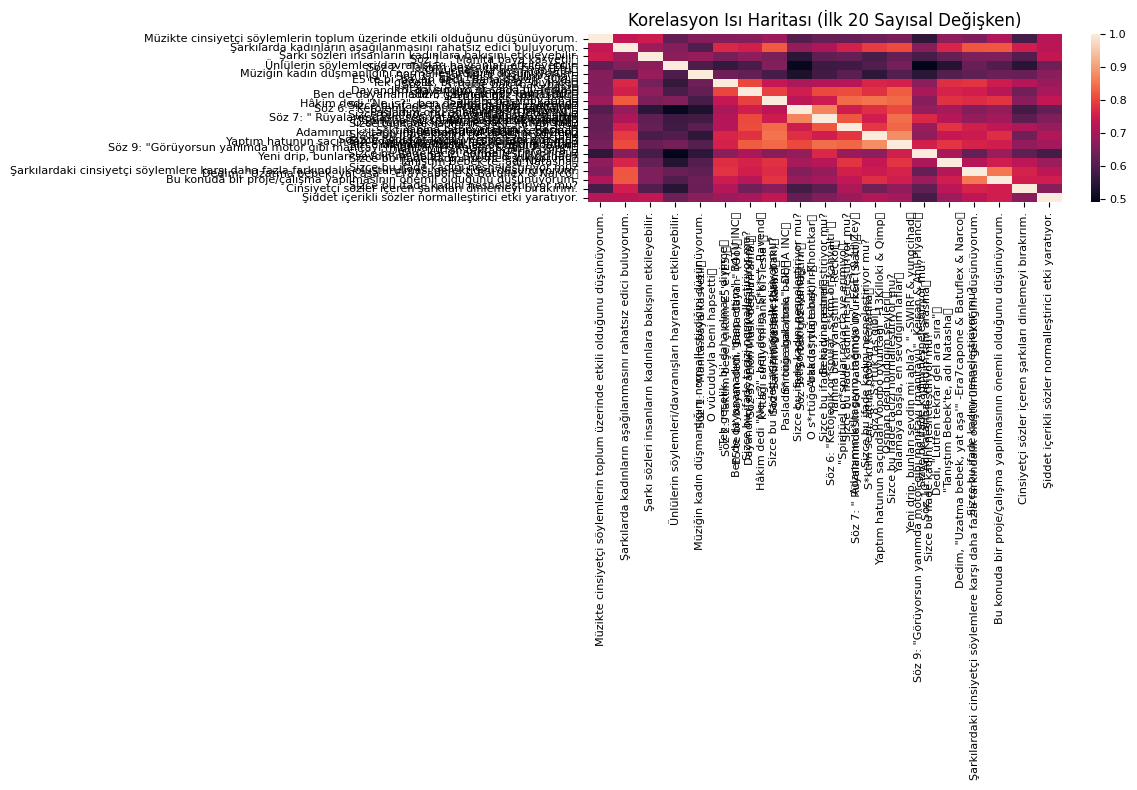

In [8]:
# === 6) Korelasyon Matrisi ===
corr = df_num[numeric_cols].corr()

# Çok fazla kolon varsa görüntü karmaşık olur; ilk 20 kolonu gösterelim (istersen arttır)
cols_to_plot = numeric_cols[:20]
corr_small = df_num[cols_to_plot].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_small, annot=False)
plt.title("Korelasyon Isı Haritası (İlk 20 Sayısal Değişken)")
plt.tight_layout()
plt.savefig("Grafikler/heatmap_corr.png", dpi=200)
plt.show()


In [9]:
# === 7) Histogram (örnek bir Likert sorusu) ===
# En yüksek ortalamaya sahip soruyu otomatik seçelim:
top_col = basic_stats.index[0] if len(basic_stats) else None
top_col


'Söz 7: " Rüyalarımdasın sen yatağında uyurken (Slatt)\r\nS*ktim seni, attım otoban kenarına\r\nYaptım hatunun saçından Voodoo oyuncağı" -13Killoki & Qimp\r\nSizce bu ifade tacizi normalleştiriyor mu?'

) missing from font(s) DejaVu Sans.kernel_17460\1969937932.py:12: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.kernel_17460\1969937932.py:13: UserWarning: Glyph 13 (
  plt.savefig("Grafikler/scatter_two_questions.png", dpi=200)


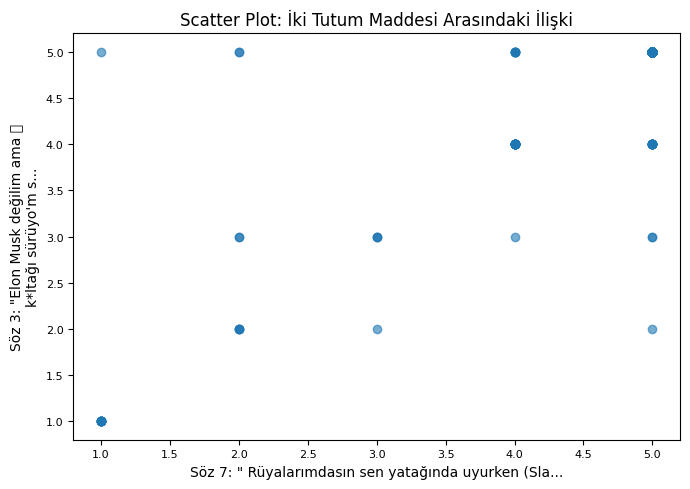

In [10]:
# === 8) Scatter Plot (iki Likert sorusu arası ilişki) ===
# Ortalama sıralamasında ilk 2 soruyu seçelim
if len(basic_stats) >= 2:
    x_col = basic_stats.index[0]
    y_col = basic_stats.index[1]

    plt.figure(figsize=(7,5))
    plt.scatter(df_num[x_col], df_num[y_col], alpha=0.6)
    plt.title("Scatter Plot: İki Tutum Maddesi Arasındaki İlişki")
    plt.xlabel(x_col[:50] + "...")
    plt.ylabel(y_col[:50] + "...")
    plt.tight_layout()
    plt.savefig("Grafikler/scatter_two_questions.png", dpi=200)
    plt.show()
else:
    print("Scatter plot için yeterli sayısal kolon yok.")


) missing from font(s) DejaVu Sans.kernel_17460\4264024627.py:11: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.kernel_17460\4264024627.py:12: UserWarning: Glyph 13 (
  plt.savefig("Grafikler/boxplot_selected.png", dpi=200)
) missing from font(s) DejaVu Sans.ythoncore-3.14-64\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


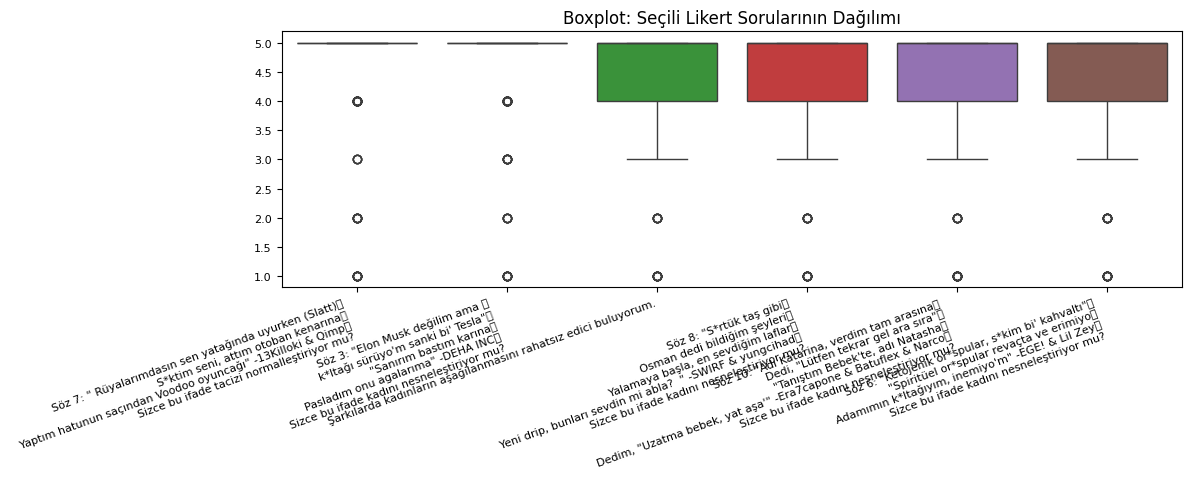

In [11]:
# === 9) Boxplot (birkaç Likert sorusunun dağılımı) ===
# Çok uzun etiketlerde üst üste binmeyi azaltmak için az sayıda soru seçiyoruz
box_cols = basic_stats.index[:6].tolist() if len(basic_stats) >= 6 else numeric_cols[:6]

if box_cols:
    data_for_box = df_num[box_cols]
    plt.figure(figsize=(12,5))
    sns.boxplot(data=data_for_box)
    plt.title("Boxplot: Seçili Likert Sorularının Dağılımı")
    plt.xticks(rotation=20, ha="right")
    plt.tight_layout()
    plt.savefig("Grafikler/boxplot_selected.png", dpi=200)
    plt.show()
else:
    print("Boxplot için uygun kolon bulunamadı.")


In [12]:
# === 10) Demografik Özet (MP3 sunumu için işine yarar) ===

def safe_value_counts(col):
    if col in df.columns:
        return df[col].value_counts()
    return None

age_counts = safe_value_counts("Yaşınız")
gender_counts = safe_value_counts("Cinsiyetiniz")
music_counts = safe_value_counts("En çok dinlediğiniz müzik türü")

age_counts, gender_counts, music_counts.head(10) if music_counts is not None else None


(Yaşınız
 19-24    157
 15-18     82
 25-34     11
 35+        3
 Name: count, dtype: int64,
 Cinsiyetiniz
 Kadın                     151
 Erkek                      99
 Belirtmek istemiyorum.      3
 Name: count, dtype: int64,
 En çok dinlediğiniz müzik türü
 Çoğu türü dinliyorum.    101
 Pop                       49
 Rap/Hip-hop               35
 Rock/Metal                32
 İndie/Alternatif          16
 Diğer                     10
 Türk Halk Müziği           4
 Arabesk                    4
 Elektronik                 2
 Name: count, dtype: int64)

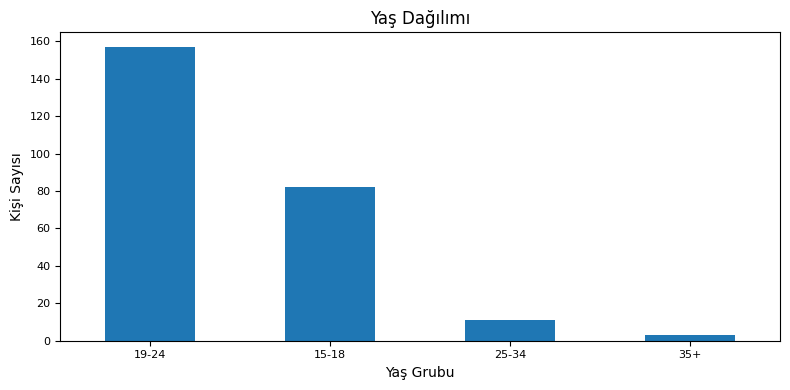

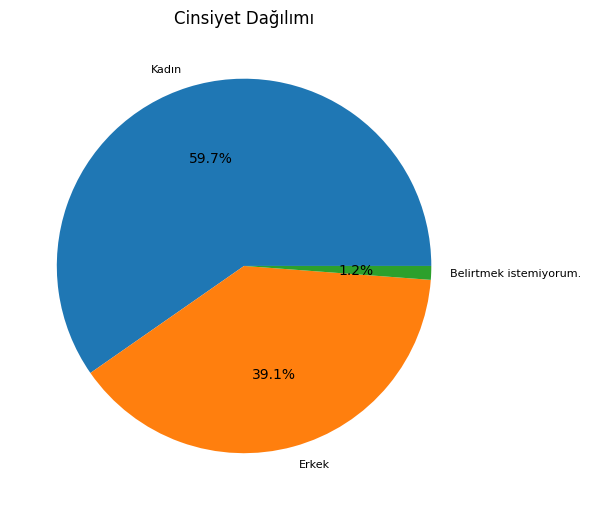

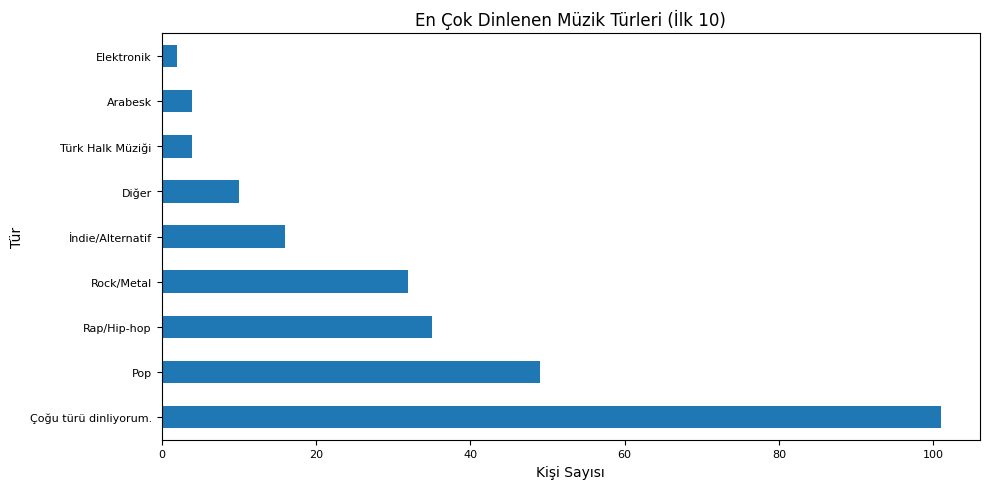

In [13]:
# Yaş dağılım grafiği
if age_counts is not None:
    plt.figure(figsize=(8,4))
    age_counts.plot(kind="bar")
    plt.title("Yaş Dağılımı")
    plt.xlabel("Yaş Grubu")
    plt.ylabel("Kişi Sayısı")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig("Grafikler/yas_dagilimi.png", dpi=200)
    plt.show()

# Cinsiyet dağılım grafiği
if gender_counts is not None:
    plt.figure(figsize=(6,6))
    gender_counts.plot(kind="pie", autopct="%1.1f%%")
    plt.title("Cinsiyet Dağılımı")
    plt.ylabel("")
    plt.tight_layout()
    plt.savefig("Grafikler/cinsiyet_pie.png", dpi=200)
    plt.show()

# Müzik türleri grafiği (ilk 10)
if music_counts is not None:
    plt.figure(figsize=(10,5))
    music_counts.head(10).plot(kind="barh")
    plt.title("En Çok Dinlenen Müzik Türleri (İlk 10)")
    plt.xlabel("Kişi Sayısı")
    plt.ylabel("Tür")
    plt.tight_layout()
    plt.savefig("Grafikler/muzik_turleri.png", dpi=200)
    plt.show()


## MP5 – Raporlama (IEEE Rapor)
Bu projenin akademik raporu IEEE Conference Template formatında hazırlanmış ve `Final_Report.pdf` olarak Final klasörüne eklenmiştir.  
Notebook içerisindeki grafikler `Grafikler/` klasörüne kaydedilerek raporda kullanılabilir.


## Sonuç (Kısa Özet)
- Katılımcıların önemli bir kısmı müzikteki cinsiyetçi söylemlerin toplum üzerinde etkili olduğunu düşünmektedir.
- Likert yanıtları genel olarak yüksek değerlerde (4–5) yoğunlaşmıştır.
- Tutum maddeleri arasında güçlü pozitif ilişkiler gözlemlenmiştir (korelasyonlar).
- Bulgular hipotezi destekler niteliktedir ve MP5 raporunda detaylandırılmıştır.
